# Covid mask image recognition

In [792]:
###Image Recognition with Trained Model
# Import the libraries
import numpy as np
# Importing os libraries so we can open folder on local storage
import os
# Import an object with methods to process image data
from keras.preprocessing import image

# Import the pre-trained model
from keras.models import Model
from keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam

# We need to install libraries tensorflow
# pip install tensorflow

In [793]:
# Importing images for image recognition from local storage 
# 

# Location of images
# Folder mask has to subfolders "no_mask" and "yes_mask"
myFile = "C:\Data camp\images\mask"
fullPath = os.path.abspath("C:\Data camp\images\mask") 
## I don't know why but keras model work for me if i dint give fname= location of my folder
data_for_processing = tf.keras.utils.get_file( fname= myFile,origin='file://'+fullPath)

In [794]:
# Preparing variables for keras model

img_height,img_width=180,180
batch_size=32
number_classes = 2

In [795]:
# Spliting our data set for training and test

# We split our data_for_processing and take 80% of available data and put it in train_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,                          #               
  validation_split=0.3,                         # Optional float between 0 and 1, fraction of data to reserve for validation.  
  subset="training",                            # One of "training" or "validation". Only used if validation_split is set.
  seed=123,                                     # Optional random seed for shuffling and transformations.
  image_size=(img_height, img_width),           # Size to resize images to after they are read from disk. Defaults to (256, 256)
  batch_size=batch_size)                        # Size of the batches of data. Default: 32. If None, the data will not be batched

# We split our data_for_processing and take 20% of available data and put it in val_ds
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 79 files belonging to 2 classes.
Using 56 files for training.
Found 79 files belonging to 2 classes.
Using 23 files for validation.


In [796]:
# Getting names of our classes. In this model class names are names of folders contained in mask folder

class_names = train_ds.class_names

print(class_names)

['no_mask', 'yes_mask']


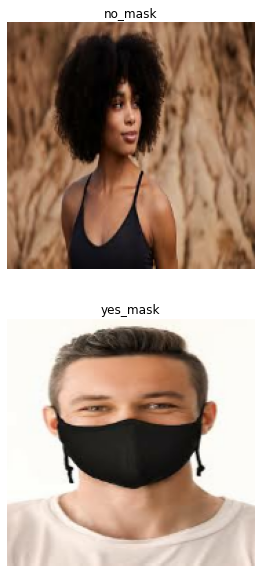

In [797]:
# Taking a look at our images in train_ds
# It show random images from our storage

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    # plt.subplot(Three integers (nrows, ncols, index).)
    plt.subplot(2, 1, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [798]:
# Initializing Sequential() model to resnet_model

resnet_model = Sequential()

# Instantiates the ResNet50 architecture.

pretrained_model= tf.keras.applications.ResNet50(
                include_top=False,                              # Whether to include the fully-connected layer at the top of the network.
                input_shape=(img_height,img_width,3),           # Optional shape tuple, only to be specified if include_top is False
                pooling='avg',                                  # Optional pooling mode for feature extraction when include_top is False. avg means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
                classes=number_classes,                                      # Optional number of classes to classify images into, only to be specified if include_top is True
                weights='imagenet')                             # 'imagenet' (pre-training on ImageNet) None
for layer in pretrained_model.layers:
        layer.trainable=False
# Adding pre trained ResNet50 model to our..
resnet_model.add(pretrained_model)

In [799]:
# Further prepering model
# Flattens the input
resnet_model.add(layers.Flatten())
# Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the 
# element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
# and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.
# Relu  (Rectified Linear Unit) Activation Function 
resnet_model.add(layers.Dense(512, activation='relu'))
# Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, 
# where the probabilities of each value are proportional to the relative scale of each value in the vector.
# Output Shape 
resnet_model.add(layers.Dense(number_classes, activation='softmax'))


resnet_model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_40 (Flatten)        (None, 2048)              0         
                                                                 
 dense_80 (Dense)            (None, 512)               1049088   
                                                                 
 dense_81 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [800]:
# Training a Model and Model Evaluation

# optimizer= Name of optimizer or optimizer instance. See tf.keras.optimizers.
# Adam(learning_rate=0.001) is optimizer we choose and imported
# loss = Loss function. Maybe be a string (name of loss function), or a tf.keras.losses.Loss instance. See tf.keras.losses. 
## A loss function is any callable with the signature
# parse_categorical_crossentropy = Computes the sparse categorical crossentropy loss.
# metrics = List of metrics to be evaluated by the model during training and testing
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training a model with train_ds and val_ds and giving epochs = 10 where 10 number of iterations of training
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 0.7338 - accuracy: 0.5714 - val_loss: 0.7455 - val_accuracy: 0.8261
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 0.4087 - accuracy: 0.8750 - val_loss: 1.7094 - val_accuracy: 0.6087
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 0.2189 - accuracy: 0.8750 - val_loss: 0.8196 - val_accuracy: 0.8261
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.7048 - val_accuracy: 0.9565
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 0.0653 - accuracy: 0.9821 - val_loss: 0.7410 - val_accuracy: 0.9565
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 0.0272 - accuracy: 0.9821 - val_loss: 0.6183 - val_accuracy: 0.9565
Epoch 7/10
2/2 [==============================] - 3s 2s/step - loss: 6.9003e-04 - accuracy: 1.0000 - val_loss: 0.5555 - val_accuracy: 0.9130
Epoch 8/10
2/2 [=====================

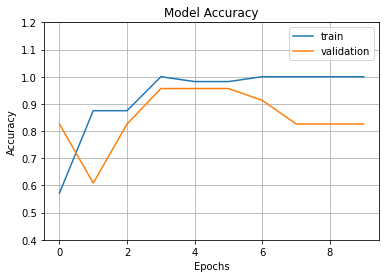

In [801]:
# Visualization of model metrics

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [802]:
# Predicting image if person is wearing a mask or not

# Formating picture to be apropriate for model to predict
imageSize=[img_height,img_width]
imageLocation = "./woman.jpg"
predictImage = tf.keras.preprocessing.image.load_img(
    imageLocation, 
    target_size=imageSize
)
img_array = tf.keras.preprocessing.image.img_to_array(predictImage)
# Expading dims again to apropriate for modelo
img_array = tf.expand_dims(img_array, 0)

# Making a prediction and dividing it with 255.0 to be able to represent likelihood in percentages
predictions = resnet_model.predict(img_array)

score = predictions[0]

print(score)



[9.9999988e-01 1.5869806e-07]


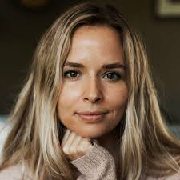

In [803]:
predictImage 

In [804]:
# Presenting the prediction

output_class=class_names[np.argmax(predictions)]
print("The predicted class is", output_class)



The predicted class is no_mask


In [805]:
# Presenting the likelihood in percentages

notoutput_class = class_names[np.argmin(predictions)]

if score[0] > score[1]:
    print("Image " + imageLocation + " has " + str(score[0] * 100) + " % chance to be " + notoutput_class + ' and ' + str(score[1] * 100) + ' % chance to be ' + output_class )
else:
    print("Image " + imageLocation + " has " + str(score[1] * 100) + " % chance to be " + output_class + ' and ' + str(score[0] * 100) + ' % chance to be ' + notoutput_class )


Image ./woman.jpg has 99.99998807907104 % chance to be yes_mask and 1.586980573620167e-05 % chance to be no_mask


In [806]:
import cv2

img_height = 180
img_width = 180

image=cv2.imread('./woman.jpg')
image2=cv2.imread('./w_mask.jpg')
#cv2.imshow('image window', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

image_resized= cv2.resize(image2, (img_width,img_height))
image2=np.expand_dims(image_resized,axis=0)

In [807]:
imageList = {
    0 : './woman.jpg',
    1 : './w_mask.jpg',
    2 : './w_mask2.jpg',
    3 : './metamask.jpg',
    4 : './woman2.jpg'
}

class_names = train_ds.class_names

for index, value in enumerate(imageList):
    image_for =cv2.imread(imageList[value])
    image_resized= cv2.resize(image_for, (img_width,img_height))
    image_for=np.expand_dims(image_resized,axis=0)
    pred=resnet_model.predict(image_for)
    output_class=class_names[np.argmax(pred)]
    print("The predicted class is", output_class)

The predicted class is no_mask
The predicted class is yes_mask
The predicted class is yes_mask
The predicted class is no_mask
The predicted class is no_mask
